In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from datetime import datetime
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [2]:
train = pickle.load(open('c_train.pickle', 'rb'))
b = pickle.load(open('c_b.pickle', 'rb'))
bb = pickle.load(open('c_bb.pickle', 'rb'))
ccb = pickle.load(open('c_cb.pickle', 'rb'))
ip = pickle.load(open('c_ip.pickle', 'rb'))
pcb = pickle.load(open('c_pcb.pickle', 'rb'))
pa = pickle.load(open('c_pa.pickle', 'rb'))
test = pickle.load(open('c_test.pickle', 'rb'))

In [3]:
train.isnull().sum()


SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 81, dtype: int64

In [4]:
b.isnull().sum()

SK_ID_CURR                0
CREDIT_ACTIVE             0
CREDIT_TYPE               0
CNT_CREDIT_PROLONG        0
CREDIT_DAY_OVERDUE        0
AMT_CREDIT_MAX_OVERDUE    0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
dtype: int64

In [5]:
bb.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [6]:
ccb.isnull().sum()

SK_ID_CURR                   0
AMT_BALANCE                  0
AMT_CREDIT_LIMIT_ACTUAL      0
AMT_RECEIVABLE_PRINCIPAL     0
AMT_RECIVABLE                0
AMT_TOTAL_RECEIVABLE         0
CNT_INSTALMENT_MATURE_CUM    0
dtype: int64

In [7]:
ip.isnull().sum()

DAYS_ENTRY_PAYMENT    0
AMT_INSTALMENT        0
AMT_PAYMENT           0
dtype: int64

In [8]:
pcb.isnull().sum()

SK_ID_CURR               0
NAME_CONTRACT_STATUS     0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
dtype: int64

In [9]:
pa.isnull().sum()

SK_ID_CURR             0
AMT_DOWN_PAYMENT       0
CODE_REJECT_REASON     0
NAME_YIELD_GROUP       0
PRODUCT_COMBINATION    0
AMT_APPLICATION        0
AMT_CREDIT             0
CNT_PAYMENT            0
dtype: int64

# Train

In [10]:
train = train[[
    'SK_ID_CURR',
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_BIRTH',
    'REGION_RATING_CLIENT_W_CITY',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY',
    'REGION_POPULATION_RELATIVE',

    
    #DROP BELOW
    'AMT_INCOME_TOTAL'

    #FEAT ENGINEERING
   
]]
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL
0,100002,1,Cash loans,M,Y,Working,0.262949,0.139376,-9461,2,-1134.0,-2120,0,0.018801,202500.0
1,100003,0,Cash loans,F,N,State servant,0.622246,0.510853,-16765,1,-828.0,-291,0,0.003541,270000.0
2,100004,0,Revolving loans,M,Y,Working,0.555912,0.729567,-19046,2,-815.0,-2531,0,0.010032,67500.0
3,100006,0,Cash loans,F,Y,Working,0.650442,0.510853,-19005,2,-617.0,-2437,0,0.008019,135000.0
4,100007,0,Cash loans,M,Y,Working,0.322738,0.510853,-19932,2,-1106.0,-3458,1,0.028663,121500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,Working,0.681632,0.510853,-9327,1,-273.0,-1982,0,0.032561,157500.0
307507,456252,0,Cash loans,F,Y,Pensioner,0.115992,0.510853,-20775,2,0.0,-4090,0,0.025164,72000.0
307508,456253,0,Cash loans,F,Y,Working,0.535722,0.218859,-14966,3,-1909.0,-5150,1,0.005002,153000.0
307509,456254,1,Cash loans,F,Y,Commercial associate,0.514163,0.661024,-11961,2,-322.0,-931,1,0.005313,171000.0


## Merging

### Credit Card Balance with Train

In [11]:
train = train.merge(ccb, how='left', on='SK_ID_CURR')
train.shape

(307511, 21)

### POS Cash Balance with Train

In [12]:
train = train.merge(pcb, how='left', on='SK_ID_CURR')
train.shape

(307511, 24)

### Bureau with Bureau Balance

In [13]:
# b = b.merge(bb, how='left', on='SK_ID_BUREAU')


### Bureau with Train

In [14]:
train = train.merge(b, how='left', on='SK_ID_CURR')
train.shape

(307511, 33)

### Previous Application with Train

In [15]:
train = train.merge(pa, how='left', on='SK_ID_CURR')
train.shape

(307511, 40)

## Feature Engineering

In [16]:
sorted_columns = sorted(train.columns)
for column in sorted_columns:
    print(column)

AMT_APPLICATION
AMT_BALANCE
AMT_CREDIT
AMT_CREDIT_LIMIT_ACTUAL
AMT_CREDIT_MAX_OVERDUE
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_CREDIT_SUM_OVERDUE
AMT_DOWN_PAYMENT
AMT_INCOME_TOTAL
AMT_RECEIVABLE_PRINCIPAL
AMT_RECIVABLE
AMT_TOTAL_RECEIVABLE
CNT_CREDIT_PROLONG
CNT_INSTALMENT
CNT_INSTALMENT_FUTURE
CNT_INSTALMENT_MATURE_CUM
CNT_PAYMENT
CODE_GENDER
CODE_REJECT_REASON
CREDIT_ACTIVE
CREDIT_DAY_OVERDUE
CREDIT_TYPE
DAYS_BIRTH
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE
EXT_SOURCE_2
EXT_SOURCE_3
FLAG_OWN_REALTY
NAME_CONTRACT_STATUS
NAME_CONTRACT_TYPE
NAME_INCOME_TYPE
NAME_YIELD_GROUP
PRODUCT_COMBINATION
REGION_POPULATION_RELATIVE
REGION_RATING_CLIENT_W_CITY
REG_CITY_NOT_WORK_CITY
SK_ID_CURR
TARGET


### Debt to Income Ratio

In [17]:
train['DTI'] = train['AMT_CREDIT_SUM_DEBT']/train['AMT_INCOME_TOTAL']
train['DTI'] = train['DTI'].round(2)

### Age

In [18]:
train['AGE'] = (train['DAYS_BIRTH']//365).abs()

### Debt Credit Ratio

In [19]:
train['DEBT_CREDIT_RATIO'] = train['AMT_CREDIT_SUM_DEBT']/train['AMT_CREDIT_SUM']
train['DEBT_CREDIT_RATIO'] = train['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], 0, inplace=True)
train['DEBT_CREDIT_RATIO'].value_counts()

C:\Users\rvuon\AppData\Local\Temp\ipykernel_33176\2643135572.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['DEBT_CREDIT_RATIO'] = train['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], 0, inplace=True)


Series([], Name: count, dtype: int64)

In [20]:
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
train.corr(numeric_only=True)['TARGET'].abs().sort_values(ascending=False)

TARGET                         1.000000
EXT_SOURCE_2                   0.160303
EXT_SOURCE_3                   0.157397
AMT_BALANCE                    0.087177
AMT_TOTAL_RECEIVABLE           0.086490
AMT_RECIVABLE                  0.086478
AMT_RECEIVABLE_PRINCIPAL       0.086062
DAYS_BIRTH                     0.078239
AGE                            0.078237
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_LAST_PHONE_CHANGE         0.055217
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
CNT_INSTALMENT_MATURE_CUM      0.040054
REGION_POPULATION_RELATIVE     0.037227
AMT_DOWN_PAYMENT               0.026017
AMT_APPLICATION                0.021803
AMT_CREDIT_SUM                 0.019956
AMT_CREDIT                     0.016114
AMT_CREDIT_SUM_LIMIT           0.011538
AMT_CREDIT_LIMIT_ACTUAL        0.008901
CREDIT_DAY_OVERDUE             0.008118
CNT_INSTALMENT                 0.007951
AMT_CREDIT_SUM_OVERDUE         0.007150
DTI                            0.005250


In [21]:
train.corr(numeric_only=True)[(train.corr(numeric_only=True) >= 0.7) | (train.corr(numeric_only=True) <= -0.7)]

,SK_ID_CURR,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,CNT_CREDIT_PROLONG,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT,AMT_APPLICATION,AMT_CREDIT,CNT_PAYMENT,DTI,AGE
SK_ID_CURR,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARGET,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXT_SOURCE_2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXT_SOURCE_3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.999711
REGION_RATING_CLIENT_W_CITY,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_LAST_PHONE_CHANGE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REG_CITY_NOT_WORK_CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


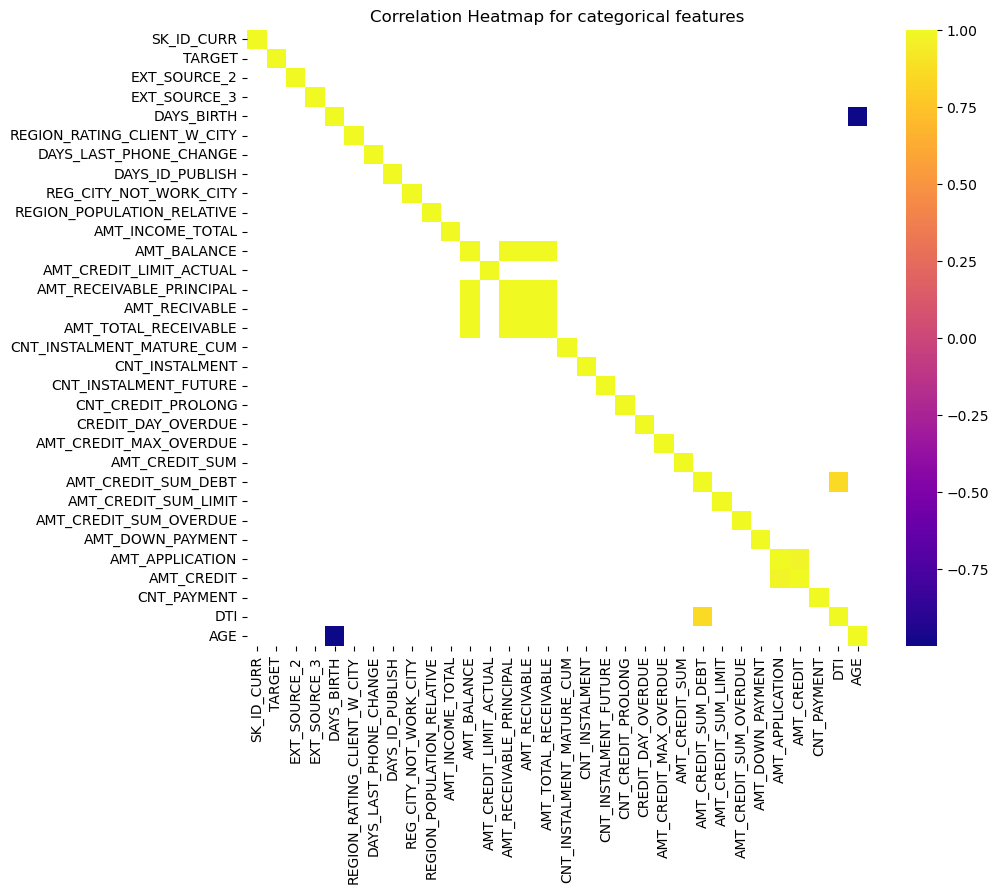

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap((train.corr(numeric_only=True)[(train.corr(numeric_only=True) >= 0.7) | (train.corr(numeric_only=True) <= -0.7)]), cmap='plasma', annot=False, annot_kws={'size': 2, 'color':'black'})
plt.title('Correlation Heatmap for categorical features')
plt.show()

In [23]:
train = train[[
    #TRAIN
    'SK_ID_CURR',
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    # 'DAYS_BIRTH',
    'REGION_RATING_CLIENT_W_CITY',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY',
    'REGION_POPULATION_RELATIVE',
    
    #CREDIT CARD BALANCE
    'AMT_BALANCE',
    # 'AMT_CREDIT_LIMIT_ACTUAL',
    # 'AMT_RECEIVABLE_PRINCIPAL',
    # 'AMT_RECIVABLE',
    'AMT_TOTAL_RECEIVABLE',
    'CNT_INSTALMENT_MATURE_CUM',

    #POS CASH BALANCE
    'NAME_CONTRACT_STATUS',
    'CNT_INSTALMENT',
    'CNT_INSTALMENT_FUTURE',
    
    #BUREAU
    'CREDIT_ACTIVE',
    'CREDIT_TYPE',
    'CNT_CREDIT_PROLONG',
    'CREDIT_DAY_OVERDUE',
    'AMT_CREDIT_MAX_OVERDUE',
    'AMT_CREDIT_SUM',
    # 'AMT_CREDIT_SUM_DEBT',
    'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE',

    #PREVIOUS APPLICATION
    'AMT_DOWN_PAYMENT',
    'CODE_REJECT_REASON',
    'NAME_YIELD_GROUP',
    'PRODUCT_COMBINATION',
    'AMT_APPLICATION',
    # 'AMT_CREDIT',
    'CNT_PAYMENT',




    #FEAT ENGINEERING
    'DTI',
    'AGE',
    'DEBT_CREDIT_RATIO'
]]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   NAME_INCOME_TYPE             307511 non-null  object 
 6   EXT_SOURCE_2                 307511 non-null  float64
 7   EXT_SOURCE_3                 307511 non-null  float64
 8   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 9   DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 10  DAYS_ID_PUBLISH              307511 non-null  int64  
 11  REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

In [24]:
train['DTI'].value_counts()

DTI
0.00     77424
0.04      2368
0.03      2330
0.05      2310
0.06      2284
         ...  
24.17        1
36.70        1
18.68        1
15.49        1
36.17        1
Name: count, Length: 2349, dtype: int64

## Encoding/Scaling

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   NAME_INCOME_TYPE             307511 non-null  object 
 6   EXT_SOURCE_2                 307511 non-null  float64
 7   EXT_SOURCE_3                 307511 non-null  float64
 8   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 9   DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 10  DAYS_ID_PUBLISH              307511 non-null  int64  
 11  REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

In [26]:
ord_feats_edit = [
    'FLAG_OWN_REALTY',
    'EXT_SOURCE_2',#
    'EXT_SOURCE_3',
    'AGE',
    'REGION_RATING_CLIENT_W_CITY',
    'CREDIT_DAY_OVERDUE',#
    'AMT_CREDIT_SUM_OVERDUE',#
    'NAME_YIELD_GROUP',
    'DTI'

    # 'FLAG_OWN_REALTY',
    # 'REGION_RATING_CLIENT_W_CITY',
    # 'AMT_CREDIT_LIMIT_ACTUAL',
    # 'NAME_YIELD_GROUP',
    # 'PRODUCT_COMBINATION'
]

ord_feats = train[ord_feats_edit]
ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats




,FLAG_OWN_REALTY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,REGION_RATING_CLIENT_W_CITY,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,NAME_YIELD_GROUP,DTI
0,1.0,28075.0,287.0,5.0,1.0,0.0,0.0,3.0,69.0
1,0.0,85082.0,546.0,25.0,0.0,0.0,0.0,4.0,32.0
2,1.0,72834.0,678.0,32.0,1.0,0.0,0.0,4.0,32.0
3,1.0,90562.0,546.0,32.0,1.0,NaN,NaN,0.0,NaN
4,1.0,36023.0,546.0,34.0,1.0,0.0,0.0,1.0,32.0
...,...,...,...,...,...,...,...,...,...
307506,0.0,96859.0,546.0,5.0,0.0,NaN,NaN,1.0,NaN
307507,1.0,11578.0,546.0,36.0,1.0,NaN,NaN,3.0,NaN
307508,1.0,69250.0,363.0,21.0,2.0,0.0,0.0,1.0,325.0
307509,1.0,65504.0,633.0,12.0,1.0,0.0,0.0,1.0,32.0


In [27]:
train.drop(columns=ord_feats, inplace=True)
train = train.merge(new_ord_feats, left_index=True, right_index=True)
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,REGION_POPULATION_RELATIVE,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,CREDIT_ACTIVE,CREDIT_TYPE,CNT_CREDIT_PROLONG,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_DOWN_PAYMENT,CODE_REJECT_REASON,PRODUCT_COMBINATION,AMT_APPLICATION,CNT_PAYMENT,DEBT_CREDIT_RATIO,FLAG_OWN_REALTY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,REGION_RATING_CLIENT_W_CITY,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,NAME_YIELD_GROUP,DTI
0,100002,1,Cash loans,M,Working,-1134.0,-2120,0,0.018801,NaN,NaN,NaN,Active,24.0,6.0,Closed,Consumer credit,0.000000,1050.643125,108131.945625,6397.713,0.000000,XAP,POS other with interest,179055.000,12.000000,None,1.0,28075.0,287.0,5.0,1.0,0.0,0.0,3.0,69.0
1,100003,0,Cash loans,F,State servant,-828.0,-291,0,0.003541,NaN,NaN,NaN,Active,12.0,0.0,Closed,Consumer credit,0.000000,0.000000,254350.125000,202500.000,2295.000000,XAP,Cash X-Sell: low,435436.500,20.000000,None,0.0,85082.0,546.0,25.0,0.0,0.0,0.0,4.0,32.0
2,100004,0,Revolving loans,M,Working,-815.0,-2531,0,0.010032,NaN,NaN,NaN,Active,4.0,0.0,Closed,Consumer credit,0.000000,0.000000,94518.900000,0.000,4860.000000,XAP,POS mobile without interest,24282.000,12.000000,None,1.0,72834.0,678.0,32.0,1.0,0.0,0.0,4.0,32.0
3,100006,0,Cash loans,F,Working,-617.0,-2437,0,0.008019,0.0,0.0,0.0,Active,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8466.887198,XAP,Cash,272203.260,22.666667,None,1.0,90562.0,546.0,32.0,1.0,NaN,NaN,0.0,NaN
4,100007,0,Cash loans,M,Working,-1106.0,-3458,1,0.028663,NaN,NaN,NaN,Active,12.0,1.0,Closed,Consumer credit,0.000000,0.000000,146250.000000,0.000,1130.250000,XAP,Cash X-Sell: middle,150530.250,28.000000,None,1.0,36023.0,546.0,34.0,1.0,0.0,0.0,1.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,Working,-273.0,-1982,0,0.032561,NaN,NaN,NaN,Active,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,XAP,POS mobile with interest,40455.000,12.000000,None,0.0,96859.0,546.0,5.0,0.0,NaN,NaN,1.0,NaN
307507,456252,0,Cash loans,F,Pensioner,0.0,-4090,0,0.025164,NaN,NaN,NaN,Active,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3456.000000,XAP,POS household without interest,57595.500,12.000000,None,1.0,11578.0,546.0,36.0,1.0,NaN,NaN,3.0,NaN
307508,456253,0,Cash loans,F,Working,-1909.0,-5150,1,0.005002,NaN,NaN,NaN,Active,6.0,0.0,Active,Consumer credit,0.000000,0.000000,990000.000000,0.000,4403.250000,XAP,POS mobile with interest,24162.750,12.000000,None,1.0,69250.0,363.0,21.0,2.0,0.0,0.0,1.0,325.0
307509,456254,1,Cash loans,F,Commercial associate,-322.0,-931,1,0.005313,NaN,NaN,NaN,Active,14.0,8.0,Closed,Consumer credit,0.000000,0.000000,45000.000000,0.000,0.000000,XAP,POS household with interest,121317.750,12.000000,None,1.0,65504.0,633.0,12.0,1.0,0.0,0.0,1.0,32.0


In [28]:
nom_feats_edit = [

    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'NAME_INCOME_TYPE',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY',
    'NAME_CONTRACT_STATUS',
    'CREDIT_ACTIVE',
    'CREDIT_TYPE',
    'CNT_CREDIT_PROLONG',
    'CODE_REJECT_REASON',
    'PRODUCT_COMBINATION',
    'CNT_PAYMENT',
    'AGE',
    'REGION_POPULATION_RELATIVE'

    # 'NAME_CONTRACT_TYPE',
    # 'CODE_GENDER',
    # 'NAME_INCOME_TYPE',
    # 'DAYS_BIRTH',
    # 'REG_CITY_NOT_WORK_CITY',
    # 'CNT_INSTALMENT_MATURE_CUM',#
    # 'NAME_CONTRACT_STATUS',
    # 'CNT_INSTALMENT',#
    # 'CNT_INSTALMENT_FUTURE',#
    # 'CREDIT_ACTIVE',
    # 'CREDIT_TYPE',
    # 'CNT_CREDIT_PROLONG',
    # 'CODE_REJECT_REASON',
    # 'CNT_PAYMENT'
]

nom_feats = train[nom_feats_edit]
ce = ce.OneHotEncoder(use_cat_names=True)
ce.fit(nom_feats)
nom_feats_encoded = ce.transform(nom_feats)
nom_feats_encoded



,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_nan,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Car loan,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_nan,CNT_CREDIT_PROLONG,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_nan,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan,CNT_PAYMENT,AGE,REGION_POPULATION_RELATIVE
0,1,0,1,0,0,1,0,0,0,0,0,0,0,-1134.0,-2120,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.000000,5.0,0.018801
1,1,0,0,1,0,0,1,0,0,0,0,0,0,-828.0,-291,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.000000,25.0,0.003541
2,0,1,1,0,0,1,0,0,0,0,0,0,0,-815.0,-2531,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.000000,32.0,0.010032
3,1,0,0,1,0,1,0,0,0,0,0,0,0,-617.0,-2437,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.666667,32.0,0.008019
4,1,0,1,0,0,1,0,0,0,0,0,0,0,-1106.0,-3458,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,28.000000,34.0,0.028663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,1,0,0,1,0,0,0,0,0,0,0,-273.0,-1982,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12.000000,5.0,0.032561
307507,1,0,0,1,0,0,0,0,1,0,0,0,0,0.0,-4090,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12.000000,36.0,0.025164
307508,1,0,0,1,0,1,0,0,0,0,0,0,0,-1909.0,-5150,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12.000000,21.0,0.005002
307509,1,0,0,1,0,0,0,1,0,0,0,0,0,-322.0,-931,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [29]:
train.drop(columns=nom_feats, inplace=True)
train = train.merge(nom_feats_encoded, left_index=True, right_index=True)
train

,SK_ID_CURR,TARGET,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_DOWN_PAYMENT,AMT_APPLICATION,DEBT_CREDIT_RATIO,FLAG_OWN_REALTY,EXT_SOURCE_2,EXT_SOURCE_3,REGION_RATING_CLIENT_W_CITY,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,NAME_YIELD_GROUP,DTI,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_nan,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Car loan,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_nan,CNT_CREDIT_PROLONG,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_nan,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan,CNT_PAYMENT,AGE,REGION_POPULATION_RELATIVE
0,100002,1,NaN,NaN,NaN,24.0,6.0,1050.643125,108131.945625,6397.713,0.000000,179055.000,None,1.0,28075.0,287.0,1.0,0.0,0.0,3.0,69.0,1,0,1,0,0,1,0,0,0,0,0,0,0,-1134.0,-2120,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.000000,5.0,0.018801
1,100003,0,NaN,NaN,NaN,12.0,0.0,0.000000,254350.125000,202500.000,2295.000000,435436.500,None,0.0,85082.0,546.0,0.0,0.0,0.0,4.0,32.0,1,0,0,1,0,0,1,0,0,0,0,0,0,-828.0,-291,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.000000,25.0,0.003541
2,100004,0,NaN,NaN,NaN,4.0,0.0,0.000000,94518.900000,0.000,4860.000000,24282.000,None,1.0,72834.0,678.0,1.0,0.0,0.0,4.0,32.0,0,1,1,0,0,1,0,0,0,0,0,0,0,-815.0,-2531,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.000000,32.0,0.010032
3,100006,0,0.0,0.0,0.0,12.0,0.0,NaN,NaN,NaN,8466.887198,272203.260,None,1.0,90562.0,546.0,1.0,NaN,NaN,0.0,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,-617.0,-2437,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.666667,32.0,0.008019
4,100007,0,NaN,NaN,NaN,12.0,1.0,0.000000,146250.000000,0.000,1130.250000,150530.250,None,1.0,36023.0,546.0,1.0,0.0,0.0,1.0,32.0,1,0,1,0,0,1,0,0,0,0,0,0,0,-1106.0,-3458,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,28.000000,34.0,0.028663
.

In [30]:
cont_feats_edit = [

    'AMT_BALANCE',
    'AMT_TOTAL_RECEIVABLE',
    'CNT_INSTALMENT_MATURE_CUM',
    'CNT_INSTALMENT',
    'CNT_INSTALMENT_FUTURE',
    'AMT_CREDIT_MAX_OVERDUE',
    'AMT_CREDIT_SUM',
    'AMT_CREDIT_SUM_LIMIT',
    'AMT_DOWN_PAYMENT',
    'AMT_APPLICATION',

    #FEAT ENGINEERING
    'DEBT_CREDIT_RATIO'
    

    # 'EXT_SOURCE_2',
    # 'EXT_SOURCE_3',
    # 'DAYS_LAST_PHONE_CHANGE',
    # 'DAYS_ID_PUBLISH',
    # 'AMT_BALANCE',
    # 'AMT_RECEIVABLE_PRINCIPAL',
    # 'AMT_RECIVABLE',
    # 'AMT_TOTAL_RECEIVABLE',
    # 'CREDIT_DAY_OVERDUE',#
    # 'AMT_CREDIT_MAX_OVERDUE',
    # 'AMT_CREDIT_SUM',
    # 'AMT_CREDIT_SUM_DEBT',
    # 'AMT_CREDIT_SUM_LIMIT',
    # 'AMT_CREDIT_SUM_OVERDUE',
    # 'AMT_DOWN_PAYMENT',
    # 'AMT_APPLICATION',
    # 'AMT_CREDIT',

    # 'DTI'

]
cont_feats = train[cont_feats_edit]
min = MinMaxScaler()
min.fit(cont_feats)
cont_feats_scaled = min.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

c:\Users\rvuon\miniforge3\envs\learn\Lib\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\rvuon\miniforge3\envs\learn\Lib\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_DOWN_PAYMENT,AMT_APPLICATION,DEBT_CREDIT_RATIO
0,NaN,NaN,NaN,0.323944,0.100000,0.000022,0.000546,0.046654,0.000000,0.044211,NaN
1,NaN,NaN,NaN,0.154930,0.000000,0.000000,0.001284,0.134380,0.001159,0.107515,NaN
2,NaN,NaN,NaN,0.042254,0.000000,0.000000,0.000477,0.043792,0.002455,0.005996,NaN
3,0.003145,0.003199,0.0,0.154930,0.000000,NaN,NaN,NaN,0.004276,0.067211,NaN
4,NaN,NaN,NaN,0.154930,0.016667,0.000000,0.000738,0.043792,0.000571,0.037168,NaN
...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,0.098592,0.000000,NaN,NaN,NaN,0.000000,0.009989,NaN
307507,NaN,NaN,NaN,0.070423,0.000000,NaN,NaN,NaN,0.001745,0.014221,NaN
307508,NaN,NaN,NaN,0.070423,0.000000,0.000000,0.004998,0.043792,0.002224,0.005966,NaN
307509,NaN,NaN,NaN,0.183099,0.133333,0.000000,0.000227,0.043792,0.000000,0.029955,NaN


In [31]:
train.drop(columns=cont_feats, inplace=True)
train = train.merge(new_cont_feats, left_index=True, right_index=True)
train

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,EXT_SOURCE_2,EXT_SOURCE_3,REGION_RATING_CLIENT_W_CITY,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,NAME_YIELD_GROUP,DTI,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_nan,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Car loan,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_nan,CNT_CREDIT_PROLONG,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_nan,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan,CNT_PAYMENT,AGE,REGION_POPULATION_RELATIVE,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_DOWN_PAYMENT,AMT_APPLICATION,DEBT_CREDIT_RATIO
0,100002,1,1.0,28075.0,287.0,1.0,0.0,0.0,3.0,69.0,1,0,1,0,0,1,0,0,0,0,0,0,0,-1134.0,-2120,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.000000,5.0,0.018801,NaN,NaN,NaN,0.323944,0.100000,0.000022,0.000546,0.046654,0.000000,0.044211,NaN
1,100003,0,0.0,85082.0,546.0,0.0,0.0,0.0,4.0,32.0,1,0,0,1,0,0,1,0,0,0,0,0,0,-828.0,-291,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.000000,25.0,0.003541,NaN,NaN,NaN,0.154930,0.000000,0.000000,0.001284,0.134380,0.001159,0.107515,NaN
2,100004,0,1.0,72834.0,678.0,1.0,0.0,0.0,4.0,32.0,0,1,1,0,0,1,0,0,0,0,0,0,0,-815.0,-2531,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.000000,32.0,0.010032,NaN,NaN,NaN,0.042254,0.000000,0.000000,0.000477,0.043792,0.002455,0.005996,NaN
3,100006,0,1.0,90562.0,546.0,1.0,NaN,NaN,0.0,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,-617.0,-2437,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.666667,32.0,0.008019,0.003145,0.003199,0.0,0.154930,0.000000,NaN,NaN,NaN,0.004276,0.067211,NaN
4,100007,0,1.0,36023.0,546.0,1.0,0.0,0.0,1.0,32.0,1,0,1,0,0,1,0,0,0,0,0,0,0,-1106.0,-3458,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,28.000000,34.0,0.028663,NaN,NaN,NaN,0.154930,0.016667,0.000000,0.000738,0.043792,0.000571,0.

## Train Test Split

In [32]:
x = train.drop(columns=['SK_ID_CURR', 'TARGET'], axis=1)
x

,FLAG_OWN_REALTY,EXT_SOURCE_2,EXT_SOURCE_3,REGION_RATING_CLIENT_W_CITY,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,NAME_YIELD_GROUP,DTI,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_nan,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Car loan,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_nan,CNT_CREDIT_PROLONG,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_nan,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan,CNT_PAYMENT,AGE,REGION_POPULATION_RELATIVE,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_DOWN_PAYMENT,AMT_APPLICATION,DEBT_CREDIT_RATIO
0,1.0,28075.0,287.0,1.0,0.0,0.0,3.0,69.0,1,0,1,0,0,1,0,0,0,0,0,0,0,-1134.0,-2120,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.000000,5.0,0.018801,NaN,NaN,NaN,0.323944,0.100000,0.000022,0.000546,0.046654,0.000000,0.044211,NaN
1,0.0,85082.0,546.0,0.0,0.0,0.0,4.0,32.0,1,0,0,1,0,0,1,0,0,0,0,0,0,-828.0,-291,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.000000,25.0,0.003541,NaN,NaN,NaN,0.154930,0.000000,0.000000,0.001284,0.134380,0.001159,0.107515,NaN
2,1.0,72834.0,678.0,1.0,0.0,0.0,4.0,32.0,0,1,1,0,0,1,0,0,0,0,0,0,0,-815.0,-2531,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.000000,32.0,0.010032,NaN,NaN,NaN,0.042254,0.000000,0.000000,0.000477,0.043792,0.002455,0.005996,NaN
3,1.0,90562.0,546.0,1.0,NaN,NaN,0.0,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,-617.0,-2437,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.666667,32.0,0.008019,0.003145,0.003199,0.0,0.154930,0.000000,NaN,NaN,NaN,0.004276,0.067211,NaN
4,1.0,36023.0,546.0,1.0,0.0,0.0,1.0,32.0,1,0,1,0,0,1,0,0,0,0,0,0,0,-1106.0,-3458,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,28.000000,34.0,0.028663,NaN,NaN,NaN,0.154930,0.016667,0.000000,0.000738,0.043792,0.000571,0.037168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,

In [33]:
y = train['TARGET']
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

## Undersampling

In [34]:
rus = RandomUnderSampler()
X_rus, Y_rus = rus.fit_resample(x,y)
X_rus.shape, Y_rus.shape

((49650, 91), (49650,))

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X_rus, Y_rus, random_state=0, stratify=Y_rus)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((37237, 91), (37237,), (12413, 91), (12413,))

## Training

### Cross Validation

In [36]:
# param_grid = {
#     'max_depth': [2,3,4],
#     'min_child_weight': [4,5,6],
#     'gamma': [0.05, 0.1, 0.15],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'n_estimators': [250, 300, 400],
#     'reg_alpha': [ 0.9, 0.92, .95],
#     'reg_lambda': [.7, .75, .79]
# }

In [37]:
# xgb = XGBClassifier(random_state=0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, reg_alpha=.93, reg_lambda=0.74)
# xgb_model = xgb.fit(xtrain, ytrain)
# xgb_pred = xgb_model.predict(xtest)

In [38]:
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5)
# grid_search.fit(xtrain, ytrain)
# best_params = grid_search.best_params_
# print('Best Parameters: ', best_params)

Best Parameters:  {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 300}

In [39]:
# best_model = grid_search.best_estimator_
# accuracy = best_model.score(xtest, ytest)
# print('Accuracy with best parameters: ', accuracy)

In [40]:
param_grid = {
    'max_depth': [10,12,14],
    'n_estimators': [325, 350, 375],
    'min_samples_split': [12, 13, 14],
    'min_samples_leaf': [0.75, 1, 1.25]
}

In [41]:
rf = RandomForestClassifier(random_state=0, max_depth=14, min_samples_leaf=1, min_samples_split=14, n_estimators=300)
rf_model = rf.fit(xtrain, ytrain)
rf_pred = rf_model.predict(xtest)


In [42]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(xtrain, ytrain)
best_params = grid_search.best_params_
print('Best Parameters: ', best_params)

c:\Users\rvuon\miniforge3\envs\learn\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rvuon\miniforge3\envs\learn\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rvuon\miniforge3\envs\learn\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\rvuon\miniforge3\envs\learn\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(


Best Parameters:  {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 375}


Best Parameters:  {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 300}
Best Parameters:  {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 375}
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 425}
Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 400}
Best Parameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}

In [43]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(xtest, ytest)
print('Accuracy with best parameters: ', accuracy)

Accuracy with best parameters:  0.6784822363651011


In [44]:
print('RF Accuracy Score: ', accuracy_score(ytest, rf_pred))
print('RF Precision Score: ', precision_score(ytest, rf_pred))
print('RF Recall Score: ', recall_score(ytest, rf_pred))

RF Accuracy Score:  0.6779183114476758
RF Precision Score:  0.680983606557377
RF Recall Score:  0.6693522397679665


max_depth=6, min_samples_leaf=1, min_samples_split=12, n_estimators=400, added REGION_POPULATION_RELATIVE as nom_feat
RF Accuracy Score:  0.6684927092564247
RF Precision Score:  0.6676286676286677
RF Recall Score:  0.6709635836287464

max_depth=6, min_samples_leaf=1, min_samples_split=12, n_estimators=400
RF Accuracy Score:  0.6694594376862967
RF Precision Score:  0.6694055099081682
RF Recall Score:  0.6695133741540444

reg_alpha=.93, reg_lambda=0.74 SCORE.66180
XGB Accuracy Score:  0.679690646902441
XGB Precision Score:  0.6835088874259381
XGB Recall Score:  0.6691911053818885

lambda .74
XGB Accuracy Score:  0.683154757109482
XGB Precision Score:  0.6870781893004115
XGB Recall Score:  0.6725749274895263

XGB Accuracy Score:  0.68218802867961
XGB Precision Score:  0.6852367688022284
XGB Recall Score:  0.6738640025781502

Feat Engineering + multicolinearity + Undersampled + Crossvalidation, adjust reg
XGB Accuracy Score:  0.6847659711592685
XGB Precision Score:  0.6857281710675522
XGB Recall Score:  0.6820818562681277

Feat Engineering + multicolinearity + Undersampled + Crossvalidation adjust max_depth2
XGB Accuracy Score:  0.6808184967372916
XGB Precision Score:  0.6848434925864909
XGB Recall Score:  0.6698356429262005

Feat Engineering + multicolinearity + Undersampled + Crossvalidation
XGB Accuracy Score:  0.6818657858696527
XGB Precision Score:  0.685456039441249
XGB Recall Score:  0.6720915243312923

Feat Engineering + multicolinearity + Undersampled
XGB Accuracy Score:  0.6696205590912753
XGB Precision Score:  0.6703901570341589
XGB Recall Score:  0.6672574927489526

Feat Engineering + multicolinearity
XGB Accuracy Score:  0.9190015348994511
XGB Precision Score:  0.4730077120822622
XGB Recall Score:  0.029648727038349983

Baseline
XGB Accuracy Score:  0.9185722833580479
XGB Precision Score:  0.4274193548387097
XGB Recall Score:  0.025620367386400257

In [45]:
roc_auc_score(ytest, rf_pred)

0.6779176214145133

RF max_depth=6, min_samples_leaf=1, min_samples_split=12, n_estimators=400 REGION_POPULATION_RELATIVE
0.6684929082957651

RF max_depth=6, min_samples_leaf=1, min_samples_split=12, n_estimators=400
0.6694594420311063

Feat Engineering + multicolinearity + Undersampled + Crossvalidation adjust max_depth2
0.6808176120221465

Feat Engineering + multicolinearity + Undersampled + Crossvalidation
0.681864998511707

Feat Engineering + multicolinearity + Undersampled
0.6696203687363258

# TEST

In [46]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,Laborers,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.9732,0.1379,0.1250,0.0505,0.0672,0.9732,0.1379,0.1250,0.0526,0.0666,0.9732,0.1379,0.1250,0.0514,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Family,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.9970,0.2759,0.3750,0.3673,0.3109,0.9970,0.2759,0.3750,0.3827,0.3081,0.9970,0.2759,0.3750,0.3739,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,Laborers,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.202145,0.425687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,..

## Credit Card Balance with Test

In [47]:
test = test.merge(ccb, how='left', on='SK_ID_CURR')

In [48]:
test.shape

(48744, 98)

## POS Cash Balance with Test

In [49]:
test = test.merge(pcb, how='left', on='SK_ID_CURR')

In [50]:
test.shape

(48744, 101)

## Bureau with Test

In [51]:
test = test.merge(b, how='left', on='SK_ID_CURR')

In [52]:
test.shape

(48744, 110)

## Previous Application with Test

In [53]:
test = test.merge(pa, how='left', on='SK_ID_CURR')

In [54]:
test.shape

(48744, 117)

## Feature Engineering

### Debt to Income Ratio

In [55]:
test['DTI'] = test['AMT_CREDIT_SUM_DEBT']/test['AMT_INCOME_TOTAL']
test['DTI'] = test['DTI'].round(2)

### Age

In [56]:
test['AGE'] = (test['DAYS_BIRTH']//365).abs()

### Debt Credit Ratio

In [57]:
test['DEBT_CREDIT_RATIO'] = test['AMT_CREDIT_SUM_DEBT']/test['AMT_CREDIT_SUM']
test['DEBT_CREDIT_RATIO'] = test['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], 0, inplace=True)
test['DEBT_CREDIT_RATIO'].value_counts()

C:\Users\rvuon\AppData\Local\Temp\ipykernel_33176\2889629048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['DEBT_CREDIT_RATIO'] = test['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], 0, inplace=True)


Series([], Name: count, dtype: int64)

In [58]:
test = test[[
    #TEST
    'SK_ID_CURR',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    # 'DAYS_BIRTH',
    'REGION_RATING_CLIENT_W_CITY',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_ID_PUBLISH',
    'REG_CITY_NOT_WORK_CITY',
    'REGION_POPULATION_RELATIVE',
    
    
    #CREDIT CARD BALANCE
    'AMT_BALANCE',
    # 'AMT_CREDIT_LIMIT_ACTUAL',
    # 'AMT_RECEIVABLE_PRINCIPAL',
    # 'AMT_RECIVABLE',
    'AMT_TOTAL_RECEIVABLE',
    'CNT_INSTALMENT_MATURE_CUM',

    #POS CASH BALANCE
    'NAME_CONTRACT_STATUS',
    'CNT_INSTALMENT',
    'CNT_INSTALMENT_FUTURE',
    
    #BUREAU
    'CREDIT_ACTIVE',
    'CREDIT_TYPE',
    'CNT_CREDIT_PROLONG',
    'CREDIT_DAY_OVERDUE',
    'AMT_CREDIT_MAX_OVERDUE',
    'AMT_CREDIT_SUM',
    # 'AMT_CREDIT_SUM_DEBT',
    'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE',

    #PREVIOUS APPLICATION
    'AMT_DOWN_PAYMENT',
    'CODE_REJECT_REASON',
    'NAME_YIELD_GROUP',
    'PRODUCT_COMBINATION',
    'AMT_APPLICATION',
    # 'AMT_CREDIT',
    'CNT_PAYMENT',




    #FEAT ENGINEERING
    'DTI',
    'AGE',
    'DEBT_CREDIT_RATIO'
]]

test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_INCOME_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,REGION_POPULATION_RELATIVE,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,CREDIT_ACTIVE,CREDIT_TYPE,CNT_CREDIT_PROLONG,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_DOWN_PAYMENT,CODE_REJECT_REASON,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_APPLICATION,CNT_PAYMENT,DTI,AGE,DEBT_CREDIT_RATIO
0,100001,Cash loans,F,Y,Working,0.789654,0.159520,2,-1740.0,-812,0,0.018850,NaN,NaN,NaN,Active,4.0,0.0,Closed,Consumer credit,0.0,0.0,0.000000,2.076236e+05,0.000000,0.0,2520.000000,XAP,high,POS mobile with interest,24835.5000,12.0,0.63,53,None
1,100005,Cash loans,M,Y,Working,0.291656,0.432962,2,0.0,-1623,0,0.035792,NaN,NaN,NaN,Active,12.0,0.0,Active,Consumer credit,0.0,0.0,0.000000,2.190420e+05,0.000000,0.0,2232.000000,XAP,XNA,Cash,22308.7500,24.0,1.91,50,None
2,100013,Cash loans,M,Y,Working,0.699787,0.610991,2,-856.0,-3503,0,0.019101,18159.919219,18101.079844,22.0,Active,36.0,0.0,Closed,Car loan,0.0,0.0,4826.250000,5.180700e+05,0.000000,0.0,1687.500000,XAP,middle,Cash,130871.2500,24.0,0.00,55,None
3,100028,Cash loans,F,Y,Working,0.509677,0.612704,2,-1805.0,-4208,0,0.026392,8085.058163,7968.609184,0.0,Active,24.0,0.0,Closed,Consumer credit,0.0,0.0,0.000000,1.267396e+05,14484.394286,0.0,2902.164478,XAP,XNA,Card X-Sell,49207.5000,14.4,0.11,39,None
4,100038,Cash loans,M,N,Working,0.425687,NaN,2,-821.0,-4262,1,0.010032,NaN,NaN,NaN,Active,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4047.750000,XAP,high,Cash X-Sell: middle,267727.5000,24.0,NaN,36,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,Y,Working,0.648575,0.643026,3,-684.0,-3399,0,0.002042,NaN,NaN,NaN,Active,24.0,0.0,Closed,Consumer credit,0.0,0.0,4571.100000,2.237598e+05,0.000000,0.0,0.000000,XAP,low_normal,Cash Street: low,225000.0000,36.0,0.92,55,None
48740,456222,Cash loans,F,N,Commercial associate,0.684596,NaN,2,0.0,-3003,1,0.035792,NaN,NaN,NaN,Active,24.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900.000000,XAP,high,Cash X-Sell: high,86871.3750,18.0,NaN,31,None
48741,456223,Cash loans,F,Y,Commercial associate,0.632770,0.283712,2,-838.0,-1504,0,0.026392,NaN,NaN,NaN,Active,9.0,0.0,Closed,Consumer credit,0.0,0.0,0.000000,4.312619e+05,7300.687500,0.0,8543.250000,XAP,low_normal,POS industry with interest,141060.0825,12.0,0.02,44,None
48742,456224,Cash loans,M,N,Commercial associate,0.445701,0.595456,2,-2308.0,-1364,1,0.018850,NaN,NaN,NaN,Active,24.0,10.0,Closed,Consumer credit,0.0,0.0,438.967059,2.263932e+05,0.000000,0.0,900.000000,XAP,high,POS mobile with interest,113758.2000,21.6,0.21,39,None


## Encoding / Scaling 

### Ordinal Encoding

In [59]:
ord_feat_test = test[ord_feats_edit]
ord_feat_test_encoded = ord.transform(ord_feat_test)
new_ord_feats_test = pd.DataFrame(ord_feat_test_encoded, columns=ord_feat_test.columns)
new_ord_feats_test

,FLAG_OWN_REALTY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,REGION_RATING_CLIENT_W_CITY,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,NAME_YIELD_GROUP,DTI
0,1.0,118326.0,309.0,32.0,1.0,0.0,0.0,1.0,95.0
1,1.0,-1.0,502.0,29.0,1.0,0.0,0.0,0.0,223.0
2,1.0,100664.0,603.0,34.0,1.0,0.0,0.0,4.0,32.0
3,1.0,64736.0,604.0,18.0,1.0,0.0,0.0,0.0,43.0
4,0.0,51113.0,-1.0,15.0,1.0,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...
48739,1.0,90192.0,622.0,34.0,2.0,0.0,0.0,3.0,124.0
48740,0.0,97477.0,-1.0,10.0,1.0,NaN,NaN,1.0,NaN
48741,1.0,87104.0,411.0,23.0,1.0,0.0,0.0,3.0,34.0
48742,0.0,54210.0,594.0,18.0,1.0,0.0,0.0,1.0,53.0


In [60]:
test.drop(columns=ord_feat_test, inplace=True)
test = test.merge(new_ord_feats_test, left_index=True, right_index=True)
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,REGION_POPULATION_RELATIVE,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,CREDIT_ACTIVE,CREDIT_TYPE,CNT_CREDIT_PROLONG,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_DOWN_PAYMENT,CODE_REJECT_REASON,PRODUCT_COMBINATION,AMT_APPLICATION,CNT_PAYMENT,DEBT_CREDIT_RATIO,FLAG_OWN_REALTY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,REGION_RATING_CLIENT_W_CITY,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,NAME_YIELD_GROUP,DTI
0,100001,Cash loans,F,Working,-1740.0,-812,0,0.018850,NaN,NaN,NaN,Active,4.0,0.0,Closed,Consumer credit,0.0,0.000000,2.076236e+05,0.000000,2520.000000,XAP,POS mobile with interest,24835.5000,12.0,None,1.0,118326.0,309.0,32.0,1.0,0.0,0.0,1.0,95.0
1,100005,Cash loans,M,Working,0.0,-1623,0,0.035792,NaN,NaN,NaN,Active,12.0,0.0,Active,Consumer credit,0.0,0.000000,2.190420e+05,0.000000,2232.000000,XAP,Cash,22308.7500,24.0,None,1.0,-1.0,502.0,29.0,1.0,0.0,0.0,0.0,223.0
2,100013,Cash loans,M,Working,-856.0,-3503,0,0.019101,18159.919219,18101.079844,22.0,Active,36.0,0.0,Closed,Car loan,0.0,4826.250000,5.180700e+05,0.000000,1687.500000,XAP,Cash,130871.2500,24.0,None,1.0,100664.0,603.0,34.0,1.0,0.0,0.0,4.0,32.0
3,100028,Cash loans,F,Working,-1805.0,-4208,0,0.026392,8085.058163,7968.609184,0.0,Active,24.0,0.0,Closed,Consumer credit,0.0,0.000000,1.267396e+05,14484.394286,2902.164478,XAP,Card X-Sell,49207.5000,14.4,None,1.0,64736.0,604.0,18.0,1.0,0.0,0.0,0.0,43.0
4,100038,Cash loans,M,Working,-821.0,-4262,1,0.010032,NaN,NaN,NaN,Active,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4047.750000,XAP,Cash X-Sell: middle,267727.5000,24.0,None,0.0,51113.0,-1.0,15.0,1.0,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,Working,-684.0,-3399,0,0.002042,NaN,NaN,NaN,Active,24.0,0.0,Closed,Consumer credit,0.0,4571.100000,2.237598e+05,0.000000,0.000000,XAP,Cash Street: low,225000.0000,36.0,None,1.0,90192.0,622.0,34.0,2.0,0.0,0.0,3.0,124.0
48740,456222,Cash loans,F,Commercial associate,0.0,-3003,1,0.035792,NaN,NaN,NaN,Active,24.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,900.000000,XAP,Cash X-Sell: high,86871.3750,18.0,None,0.0,97477.0,-1.0,10.0,1.0,NaN,NaN,1.0,NaN
48741,456223,Cash loans,F,Commercial associate,-838.0,-1504,0,0.026392,NaN,NaN,NaN,Active,9.0,0.0,Closed,Consumer credit,0.0,0.000000,4.312619e+05,7300.687500,8543.250000,XAP,POS industry with interest,141060.0825,12.0,None,1.0,87104.0,411.0,23.0,1.0,0.0,0.0,3.0,34.0
48742,456224,Cash loans,M,Commercial associate,-2308.0,-1364,1,0.018850,NaN,NaN,NaN,Active,24.0,10.0,Closed,Consumer credit,0.0,438.967059,2.263932e+05,0.000000,900.000000,XAP,POS mobile with interest,113758.2000,21.6,None,0.0,54210.0,594.0,18.0,1.0,0.0,0.0,1.0,53.0


### Nominal Encoding

In [61]:
nom_feats_test = test[nom_feats_edit]
nom_feats_encoded_test = ce.transform(nom_feats_test)


In [62]:
test.drop(columns=nom_feats_test, inplace=True)
test = test.merge(nom_feats_encoded_test, left_index=True, right_index=True)
test

,SK_ID_CURR,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_DOWN_PAYMENT,AMT_APPLICATION,DEBT_CREDIT_RATIO,FLAG_OWN_REALTY,EXT_SOURCE_2,EXT_SOURCE_3,REGION_RATING_CLIENT_W_CITY,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,NAME_YIELD_GROUP,DTI,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_nan,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Car loan,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_nan,CNT_CREDIT_PROLONG,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_nan,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan,CNT_PAYMENT,AGE,REGION_POPULATION_RELATIVE
0,100001,NaN,NaN,NaN,4.0,0.0,0.000000,2.076236e+05,0.000000,2520.000000,24835.5000,None,1.0,118326.0,309.0,1.0,0.0,0.0,1.0,95.0,1,0,0,1,0,1,0,0,0,0,0,0,0,-1740.0,-812,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12.0,32.0,0.018850
1,100005,NaN,NaN,NaN,12.0,0.0,0.000000,2.190420e+05,0.000000,2232.000000,22308.7500,None,1.0,-1.0,502.0,1.0,0.0,0.0,0.0,223.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0,-1623,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,29.0,0.035792
2,100013,18159.919219,18101.079844,22.0,36.0,0.0,4826.250000,5.180700e+05,0.000000,1687.500000,130871.2500,None,1.0,100664.0,603.0,1.0,0.0,0.0,4.0,32.0,1,0,1,0,0,1,0,0,0,0,0,0,0,-856.0,-3503,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,34.0,0.019101
3,100028,8085.058163,7968.609184,0.0,24.0,0.0,0.000000,1.267396e+05,14484.394286,2902.164478,49207.5000,None,1.0,64736.0,604.0,1.0,0.0,0.0,0.0,43.0,1,0,0,1,0,1,0,0,0,0,0,0,0,-1805.0,-4208,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14.4,18.0,0.026392
4,100038,NaN,NaN,NaN,12.0,1.0,NaN,NaN,NaN,4047.750000,267727.5000,None,0.0,51113.0,-1.0,1.0,NaN,NaN,1.0,NaN,1,0,1,0,0,1,0,0,0,0,0,0,0,-821.0,-4262,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,15.0,0.010032
...,...,...,...,...,

### Scaling

In [63]:
cont_feats_test = test[cont_feats_edit]
cont_feats_scaled_test = min.transform(cont_feats_test)
new_cont_feats_test = pd.DataFrame(cont_feats_scaled_test, columns=cont_feats_test.columns)
new_cont_feats_test


,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_DOWN_PAYMENT,AMT_APPLICATION,DEBT_CREDIT_RATIO
0,NaN,NaN,NaN,0.042254,0.000000,0.000000,0.001048,0.043792,0.001273,0.006132,NaN
1,NaN,NaN,NaN,0.154930,0.000000,0.000000,0.001106,0.043792,0.001127,0.005508,NaN
2,0.022638,0.022959,0.2,0.492958,0.000000,0.000102,0.002616,0.043792,0.000852,0.032314,NaN
3,0.011824,0.011898,0.0,0.323944,0.000000,0.000000,0.000640,0.050271,0.001466,0.012150,NaN
4,NaN,NaN,NaN,0.154930,0.016667,NaN,NaN,NaN,0.002044,0.066106,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48739,NaN,NaN,NaN,0.323944,0.000000,0.000096,0.001130,0.043792,0.000000,0.055556,NaN
48740,NaN,NaN,NaN,0.323944,0.166667,NaN,NaN,NaN,0.000455,0.021450,NaN
48741,NaN,NaN,NaN,0.112676,0.000000,0.000000,0.002177,0.047058,0.004315,0.034830,NaN
48742,NaN,NaN,NaN,0.323944,0.166667,0.000009,0.001143,0.043792,0.000455,0.028088,NaN


In [64]:
test.drop(columns=cont_feats_test, inplace=True)
test = test.merge(new_cont_feats_test, left_index=True, right_index=True)
test

,SK_ID_CURR,FLAG_OWN_REALTY,EXT_SOURCE_2,EXT_SOURCE_3,REGION_RATING_CLIENT_W_CITY,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE,NAME_YIELD_GROUP,DTI,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_nan,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Car loan,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_nan,CNT_CREDIT_PROLONG,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_XNA,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_nan,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_Card Street,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_POS others without interest,PRODUCT_COMBINATION_nan,CNT_PAYMENT,AGE,REGION_POPULATION_RELATIVE,AMT_BALANCE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_DOWN_PAYMENT,AMT_APPLICATION,DEBT_CREDIT_RATIO
0,100001,1.0,118326.0,309.0,1.0,0.0,0.0,1.0,95.0,1,0,0,1,0,1,0,0,0,0,0,0,0,-1740.0,-812,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12.0,32.0,0.018850,NaN,NaN,NaN,0.042254,0.000000,0.000000,0.001048,0.043792,0.001273,0.006132,NaN
1,100005,1.0,-1.0,502.0,1.0,0.0,0.0,0.0,223.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0,-1623,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,29.0,0.035792,NaN,NaN,NaN,0.154930,0.000000,0.000000,0.001106,0.043792,0.001127,0.005508,NaN
2,100013,1.0,100664.0,603.0,1.0,0.0,0.0,4.0,32.0,1,0,1,0,0,1,0,0,0,0,0,0,0,-856.0,-3503,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,34.0,0.019101,0.022638,0.022959,0.2,0.492958,0.000000,0.000102,0.002616,0.043792,0.000852,0.032314,NaN
3,100028,1.0,64736.0,604.0,1.0,0.0,0.0,0.0,43.0,1,0,0,1,0,1,0,0,0,0,0,0,0,-1805.0,-4208,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14.4,18.0,0.026392,0.011824,0.011898,0.0,0.323944,0.000000,0.000000,0.000640,0.050271,0.001466,0.012150,NaN
4,100038,0.0,51113.0,-1.0,1.0,NaN,NaN,1.0,NaN,1,0,1,0,0,1,0,0,0,0,0,0,0,-821.0,-4262,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,15.0,0.010032,NaN,NaN,NaN,0.154930,0.016667,NaN,NaN,NaN,0.002044,0.066106,NaN
...,...,...,...,...,...,...,...,...,...,...,

In [65]:
test.shape, xtrain.shape

((48744, 92), (37237, 91))

In [66]:
set(xtrain.columns.tolist()) - set(test.columns.tolist())

set()

In [67]:
set(test.columns.tolist()) - set(xtrain.columns.tolist())

{'SK_ID_CURR'}

In [68]:
test2 = test.reindex(columns=xtrain.columns).fillna(0)
test2 = test2[xtrain.columns]

In [69]:
test2.shape, xtrain.shape

((48744, 91), (37237, 91))

In [70]:
rf_pred_test = rf_model.predict(test2)
rf_pred_test

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [71]:
predictions = rf_model.predict_proba(test2)
predictions

array([[0.57676525, 0.42323475],
       [0.30698501, 0.69301499],
       [0.68150001, 0.31849999],
       ...,
       [0.67410034, 0.32589966],
       [0.54784125, 0.45215875],
       [0.29295923, 0.70704077]])

In [72]:
results = pd.DataFrame(predictions, columns=['Prob_of_0', 'Prob_of_1'])
results

,Prob_of_0,Prob_of_1
0,0.576765,0.423235
1,0.306985,0.693015
2,0.681500,0.318500
3,0.669904,0.330096
4,0.380335,0.619665
...,...,...
48739,0.640330,0.359670
48740,0.469034,0.530966
48741,0.674100,0.325900
48742,0.547841,0.452159


In [73]:
rf_pred_test[1]

1

In [74]:
submission = test[['SK_ID_CURR']]
submission

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038
...,...
48739,456221
48740,456222
48741,456223
48742,456224


In [75]:
submission.value_counts()

SK_ID_CURR
100001        1
336464        1
336413        1
336418        1
336426        1
             ..
217143        1
217148        1
217155        1
217162        1
456250        1
Name: count, Length: 48744, dtype: int64

In [76]:
submission.loc[:, 'TARGET'] = rf_pred_test
submission

C:\Users\rvuon\AppData\Local\Temp\ipykernel_33176\256890887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.loc[:, 'TARGET'] = rf_pred_test


,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,1
...,...,...
48739,456221,0
48740,456222,1
48741,456223,0
48742,456224,0


In [77]:
submission['TARGET'].value_counts()

TARGET
0    29025
1    19719
Name: count, dtype: int64

In [78]:
# submission.to_csv('project_loan_rf_cv_REGION_POPULATION_RELATIVE_DEBT_CREDIT_RATIO_051424.csv', index=False)